# Convolutional Neural Network

In [33]:
# pip install matplotlib

In [37]:
# pip install pillow

### Importing the libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from PIL import Image
print("Pillow is working!")

Pillow is working!


In [3]:
tf.__version__

'2.13.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255, #This is feature scaling since each pixel has value between 0-255, so now result will be between 0&1
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [12]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Code to check some images

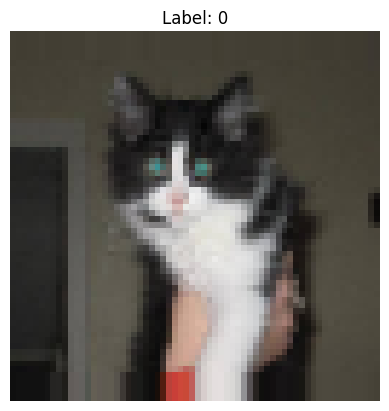

In [27]:


# Fetch a single batch (32 images)
images, labels = next(training_set)

# Display the first image
plt.imshow(images[23])
plt.title(f'Label: {int(labels[0])}')
plt.axis('off')
plt.show()

## Part 2 - Building the CNN

### Initialising the CNN

In [29]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [31]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

#filters -->feature detectors, here we are using 32 different filters or feature detectors
#kernel_size ---> size of feature detector, here 3X3. It is a square matrix always
#activation -->here is rectifier actiation func
#input_shape=[64, 64, 3] -->64X64 configured before, 1 for Black and white & 3 for colour as RGB


### Step 2 - Pooling

In [33]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
#Pool size is the size of the square matrix used during max pooling, strides is by how much the frame is moving
#padding --> is ignoring the other empty thing as there is no value on right side of a matrix

### Adding a second convolutional layer

In [35]:
#In the second conv layer we donot need input_shape
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [38]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [10]:
#units is the no of hidden neurons
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [40]:
#in the final layer the no of neuron is 1 --> cat or dog, also last layer for binary classification should be sigmoid other wise for multi class clasification should be soft max
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [42]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [44]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 74s 295ms/step - loss: 0.6683 - accuracy: 0.5869 - val_loss: 0.6223 - val_accuracy: 0.6700
Epoch 2/25
250/250 [==============================] - 23s 91ms/step - loss: 0.6025 - accuracy: 0.6718 - val_loss: 0.5771 - val_accuracy: 0.6925
Epoch 3/25
250/250 [==============================] - 24s 97ms/step - loss: 0.5629 - accuracy: 0.7067 - val_loss: 0.5442 - val_accuracy: 0.7275
Epoch 4/25
250/250 [==============================] - 24s 97ms/step - loss: 0.5314 - accuracy: 0.7300 - val_loss: 0.5103 - val_accuracy: 0.7515
Epoch 5/25
250/250 [==============================] - 22s 88ms/step - loss: 0.5220 - accuracy: 0.7404 - val_loss: 0.5784 - val_accuracy: 0.7110
Epoch 6/25
250/250 [==============================] - 22s 90ms/step - loss: 0.5040 - accuracy: 0.7536 - val_loss: 0.5012 - val_accuracy: 0.7695
Epoch 7/25
250/250 [==============================] - 24s 95ms/step - loss: 0.4922 - accuracy: 0.7600 - val_loss: 0.4907 - val_accuracy

## Part 4 - Making a single prediction

In [46]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 [==============================] - 0s 84ms/step


In [48]:
print(prediction)

dog


In [56]:
result[0]

array([1.], dtype=float32)

In [64]:
result[0][0]


1.0